# <font color='black'> CREDIT DEFAULT CLASSIFICATION </font>
## <font color='black'> DSCI 100 - GROUP 85: GROUP PROJECT REPORT </font>

### <font color='navy'> I. Introduction </font>

This past year, Canada’s inflation rate reached a 30-year high of 5.7% (Evans, 2022). In turn, the increased cost of living has caused a 6.4% increase in credit balances (Senett, 2022). Without a comparable increase in wages, Canadians are at a greater risk of credit card default. Credit default occurs when an individual misses the minimum payment due for six months (Bucci, 2022). Credit default has vast ramifications including weak credit scores and lawsuits.

By exploring precursors to credit default, individuals become equipped to identify warning signs. The following question arises: **will an individual default on their credit payment?**

The “Default of Credit Card Clients” dataset from the UC Irvine Machine Learning Repository allows us to answer this question. It provides data on an individual’s age, sex, highest level of education obtained, marital status, amount of given credit (NTD), history of past payments, bill statement amounts (NTD), monthly payment amounts (NTD), and most importantly, whether this individual had defaulted. 

<img align="left" src="https://media.giphy.com/media/kt6rktnml8cPSdpHF9/giphy.gif" width = "400"/>

Source: https://media.giphy.com/media/kt6rktnml8cPSdpHF9/giphy.gif

### <font color='navy'> II. Methods and Results </font>

Prior to fitting a predictive model, we performed a preliminary analysis to clean and wrangle the data while exploring relationships in the dataset.

#### <font color='green'> Exploratory Data Analysis

We begin by loading library packages and setting a seed.

In [1]:
install.packages("readxl")
install.packages("ggfortify")

library(repr)
library(tidyverse)
library(tidymodels)
library(ggplot2)
library(cowplot)
library(readxl)
library(ggfortify)

options(repr.matrix.max.rows = 6)
set.seed(1)

Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done

Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.6     ✔ purrr   0.3.4
✔ tibble  3.1.7     ✔ dplyr   1.0.9
✔ tidyr   1.2.0     ✔ stringr 1.4.0
✔ readr   2.1.2     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

── Attaching packages ────────────────────────────────────── tidymodels 1.0.0 ──

✔ broom        1.0.0     ✔ rsample      1.0.0
✔ dials        1.0.0     ✔ tune         1.0.0
✔ infer        1.0.2     ✔ workflows    1.0.0
✔ modeldata    1.0.0     ✔ workflowsets 1.0.0
✔ parsnip      1.0.0     ✔ yardstick    1.0.0
✔ recipes      1.0.1     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr:

#### <font color='fushsia'> Read the Data </font>

We read the data from the web such that the original dataset with 30,000 rows and 25 columns appears as below in Table 1.

In [2]:
url1 <- 'https://archive.ics.uci.edu/ml/machine-learning-databases/00350/default%20of%20credit%20card%20clients.xls'

download.file(url1, destfile = "credit_default.xls")
credit_data <- read_excel("credit_default.xls", skip = 1)
credit_data

ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,⋯,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,20000,2,2,1,24,2,2,-1,-1,⋯,0,0,0,0,689,0,0,0,0,1
2,120000,2,2,2,26,-1,2,0,0,⋯,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,90000,2,2,2,34,0,0,0,0,⋯,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋱,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
29998,30000,1,2,2,37,4,3,2,-1,⋯,20878,20582,19357,0,0,22000,4200,2000,3100,1
29999,80000,1,3,1,41,1,-1,0,0,⋯,52774,11855,48944,85900,3409,1178,1926,52964,1804,1
30000,50000,1,2,1,46,0,0,0,0,⋯,36535,32428,15313,2078,1800,1430,1000,1000,1000,1


*Table 1: Original Dataset from the Web*

The data in each column of Table 1 is described below:
+ `LIMIT_BAL` -- the amount of credit (NTD) given to the individual by the credit company
+ `SEX` -- 1 = male; 2 = female 
+ `EDUCATION` -- 1 = graduate school; 2 = university; 3 = high school; 4 = other
+ `MARRIAGE` -- 1 = married; 2 = single; 3 = other
+ `AGE` -- (years)
+ `PAY_0:PAY_6` -- history of past payment, -1 = pay dult, 1 = payment delay for one month, 2 = payment delay for 2 months, etc.
+ `BILL_AMT1:BILL_AMT6` -- amount of the bill statement (NTD) from April 2005 to September 2005
+ `PAY_AMT1:PAY_AMT6` -- amount of previous payment (NTD) from April 2005 to September 2005

#### <font color='fushsia'> Clean and Wrangle the Data </font>

Although the data is already tidy, there are still improvements to be made.

+ First, to provide a clear understanding of the dataset, we rename the columns to demonstrate the specific month of the year it represents. These months were determined by the authors of the dataset.
+ In addition, we change the data type of the DEFAULT column from double to factor, as this is our target variable for a classification model.
+ To both ensure that the kernel does not fail and enable faster run times without significantly sacrificing model accuracy, we select a sample of 15,000 rows for analysis.
+ Finally, to prepare for our predictive model, we split the data into training and testing sets. To guarantee that our split is reproducible, we set a seed.

Table 2 below shows our training data set, with 11,249 rows and 25 columns:

In [3]:
set.seed(1)

#TIDY THE DATA
tidy_credit_data <- credit_data |>
                    rename(PAY_HISTORY_SEPT = PAY_0,
                           PAY_HISTORY_AUG = PAY_2,
                           PAY_HISTORY_JUL = PAY_3,
                           PAY_HISTORY_JUN = PAY_4,
                           PAY_HISTORY_MAY = PAY_5,
                           PAY_HISTORY_APR = PAY_6,
                           BILL_SEPT = BILL_AMT1,
                           BILL_AUG = BILL_AMT2,
                           BILL_JUL = BILL_AMT3,
                           BILL_JUN = BILL_AMT4,
                           BILL_MAY = BILL_AMT5,
                           BILL_APR = BILL_AMT6,
                           PAY_SEPT = PAY_AMT1,
                           PAY_AUG = PAY_AMT2,
                           PAY_JUL = PAY_AMT3,
                           PAY_JUN = PAY_AMT4,
                           PAY_MAY = PAY_AMT5,
                           PAY_APR = PAY_AMT6,
                           DEFAULT = "default payment next month") |>

                    mutate(DEFAULT= as_factor(DEFAULT)) |>
                    slice_sample(n = 15000) 


#SPLIT DATA INTO TRAINING AND TESTING SUBSETS
credit_split <- initial_split(tidy_credit_data,
                              prop = 0.75, 
                              strata = DEFAULT)
credit_train <- training(credit_split)
credit_test <- testing (credit_split)

credit_train

ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_HISTORY_SEPT,PAY_HISTORY_AUG,PAY_HISTORY_JUL,PAY_HISTORY_JUN,⋯,BILL_JUN,BILL_MAY,BILL_APR,PAY_SEPT,PAY_AUG,PAY_JUL,PAY_JUN,PAY_MAY,PAY_APR,DEFAULT
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
17401,200000,2,1,1,49,-1,-1,-1,-1,⋯,950,0,1900,950,950,950,0,1900,950,0
24388,320000,1,1,1,40,-1,-1,-1,-1,⋯,8240,15273,16106,8240,8240,8240,15273,16106,9690,0
13218,320000,2,1,1,42,1,2,2,0,⋯,252323,253557,256525,10000,450,7025,7161,8000,6883,0
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋱,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
10831,10000,1,2,2,22,2,0,0,-1,⋯,528,0,0,1238,1275,528,0,0,0,1
25859,140000,2,2,1,37,-1,-1,-1,-1,⋯,1516,326,1439,326,326,1516,326,1439,326,1
14693,170000,1,2,1,34,1,2,2,2,⋯,64363,55912,54500,3400,0,3957,0,2200,1300,1


*Table 2: Training Dataset*

#### <font color='fushsia'> Summary Statistics </font>

To explore the training data, we first check for missing values. Based on Table 3 below, we see that there are no missing values in the training set.

In [4]:
#CHECK FOR NA VALUES

missing_values <- data.frame(Number_of_Missing_Values = sum(is.na(credit_train)))
missing_values

Number_of_Missing_Values
<int>
0


*Table 3: Target Variable Summary Table on Missing Values*

Next, we take a look at the distribution of the target class: DEFAULT.

In [5]:
#SUMMARIZE DEFAULT/NON DEFAULT DISTRIBUTION

num_obs <- nrow(credit_train)
            credit_train |>
            group_by(DEFAULT) |>
            summarize(Count = n(), Percentage = n() / num_obs * 100)

DEFAULT,Count,Percentage
<fct>,<int>,<dbl>
0,8740,77.6958
1,2509,22.3042


*Table 4: Target Variable Summary Table on Categorical Data*

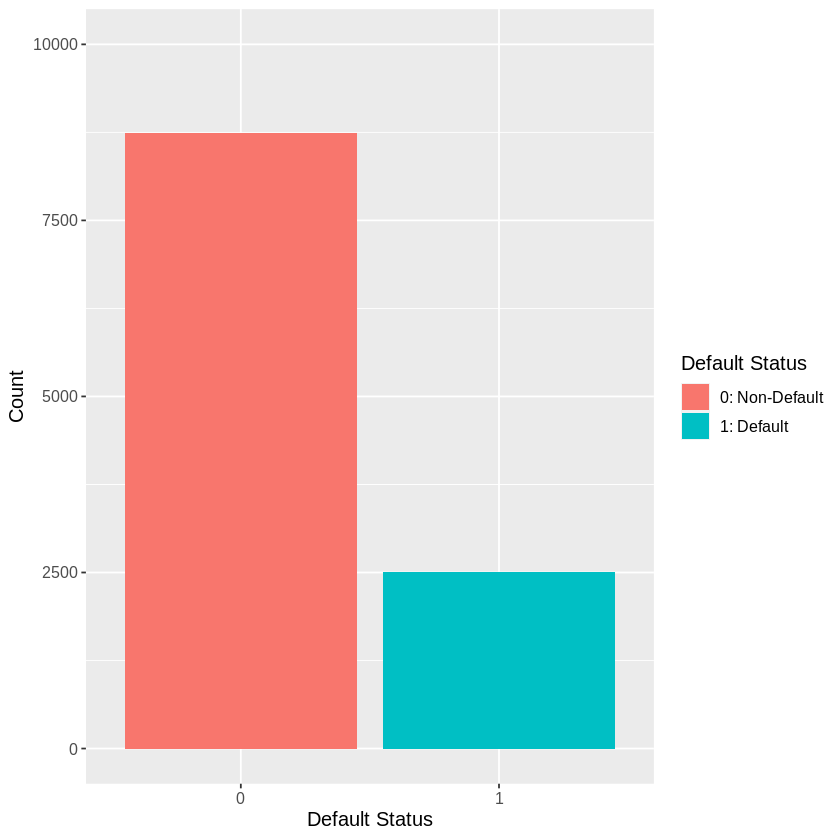

In [6]:
# VISUALIZE CLASS DISTRIBUTION

num_plot <- ggplot(credit_train, aes(x = DEFAULT, fill = as_factor(DEFAULT))) +
            geom_bar(stat = "count") +
            labs(x = "Default Status", y = "Count", fill = "Default Status") +
            scale_fill_discrete(labels = c("0: Non-Default", "1: Default")) +
            scale_y_continuous(limits = c(0,10000)) +
            theme(text = element_text(size = 12))
                    
num_plot

*Figure 1: Distribution of Credit Default in Training Set*

Looking at Table 4 and its visualization in Figure 1, we see that:
+ 78% of credit card clients pay their bills, hence non-default (DEFAULT = 0)
+ 22% of clients default on their credit cards (DEFAULT = 1)
+ The distribution of credit card default is highly imbalanced, where non-default outnumbers default. This is expected as most people pay at least a portion of their credit card bill on time given a stable economy and home-life

While considering potential predictor variables, we notice that the bill statement amount and payment amount each month are inherently connected. If the bill statement amount and payment amount are equal, it is unlikely for an individual to default as they would not owe the credit company anything. Similarly, if the bill statment amount is greater than the payment amount, the individual would be in debt to the company. As debt is closely linked to credit default, the relationship between bill statement amount and payment amount is explored below. To determine the average bill statement amount and the average payment amount each month: 

In [16]:
#SUMMARIZE BILL STATEMENT AMOUNT
average_summarize <- credit_train |>
                     select(BILL_SEPT:PAY_APR) |>
                     map_df(mean, na.rm=TRUE) 

average_summarize_bill <- average_summarize |>
                          pivot_longer(cols = BILL_SEPT:BILL_APR,
                                       names_to = "Month",
                                       values_to = "Mean_Amount") |>
                          select(Month:Mean_Amount)
average_summarize_bill

Month,Mean_Amount
<chr>,<dbl>
BILL_SEPT,52078.22
BILL_AUG,50029.63
BILL_JUL,48032.24
BILL_JUN,44312.64
BILL_MAY,41349.74
BILL_APR,39731.71


*Table 5: Average Bill Statement Amount each Month*

In [8]:
#SUMMARIZE PAYMENT AMOUNT
average_summarize_pay <- average_summarize |>
                         pivot_longer(cols = PAY_SEPT:PAY_APR,
                                      names_to = "Month",
                                      values_to = "Mean_Amount") |>
                         select(Month:Mean_Amount)
average_summarize_pay

Month,Mean_Amount
<chr>,<dbl>
PAY_SEPT,5788.625
PAY_AUG,5940.109
PAY_JUL,5254.558
PAY_JUN,4861.044
PAY_MAY,4661.477
PAY_APR,5126.886


*Table 6: Average Payment Amount each Month*

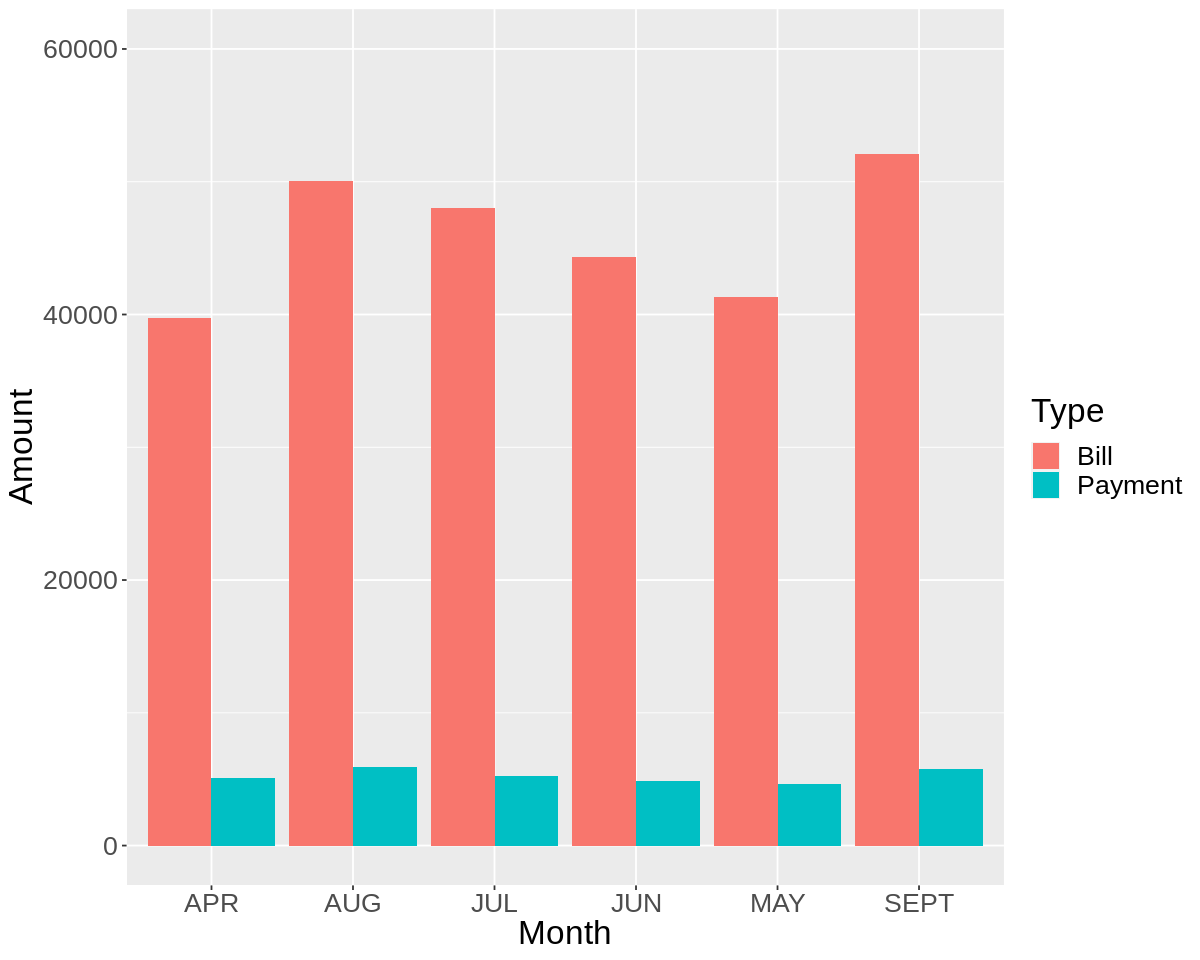

In [9]:
#VISUALIZATION OF BILL STATEMENT AND PAYMENT AMOUNTS

options(repr.plot.width = 10, repr.plot.height = 8)

Months = c("SEPT","AUG","JUL","JUN","MAY","APR")

bill_transform <- as.data.frame(average_summarize_bill)
bill_dtf <- bill_transform |>
            rename(Bill = Mean_Amount) |>
            select(- Month) |>
            cbind(Months)

pay_transform <- as.data.frame(average_summarize_pay)
pay_dtf <- pay_transform |>
           rename(Payment = Mean_Amount) |>
           select(- Month)

combined_df = cbind(pay_dtf,bill_dtf)

combined_df_long <- pivot_longer(combined_df,
                                 cols = Payment:Bill,
                                 names_to = "Type",
                                 values_to = "Amount")

bill_pay_plot <- ggplot(combined_df_long, aes(x = Months, y = Amount, fill = Type)) + 
                 geom_bar(stat = 'identity', position = "dodge") +
                 labs(x = "Month", y = "Amount", fill = "Type") +
                 scale_y_continuous(limits = c(0,60000)) +
                 theme(text = element_text(size = 20))
bill_pay_plot

*Figure 2: Average Bill Statement versus Payment Amount each Month*

As per Tables 5 and 6 and their visualization in Figure 2, we observe that the mean bill amount is higher than the mean payment amount each month. While this data is the average across all individuals in the dataset, it implies that there must be people who are either are not paying their credit card bills in full or not making payments at all. In turn, it is evident that some individuals face credit debt, at least to an extent. As such, this is a good indication that bill statement amounts and payment amounts can predict whether an individual will default.

#### <font color='fushsia'> Visualization </font>

To further explore the relationship between bill statement amount, payment amount, and whether an individual will default, we create several scatter plots with an x-axis of monthly bill statements, a y-axis of monthly payment amounts, and a colour mapping to Default (1) or Non-Default (0).

Warning message:
“Removed 2 rows containing missing values (geom_point).”


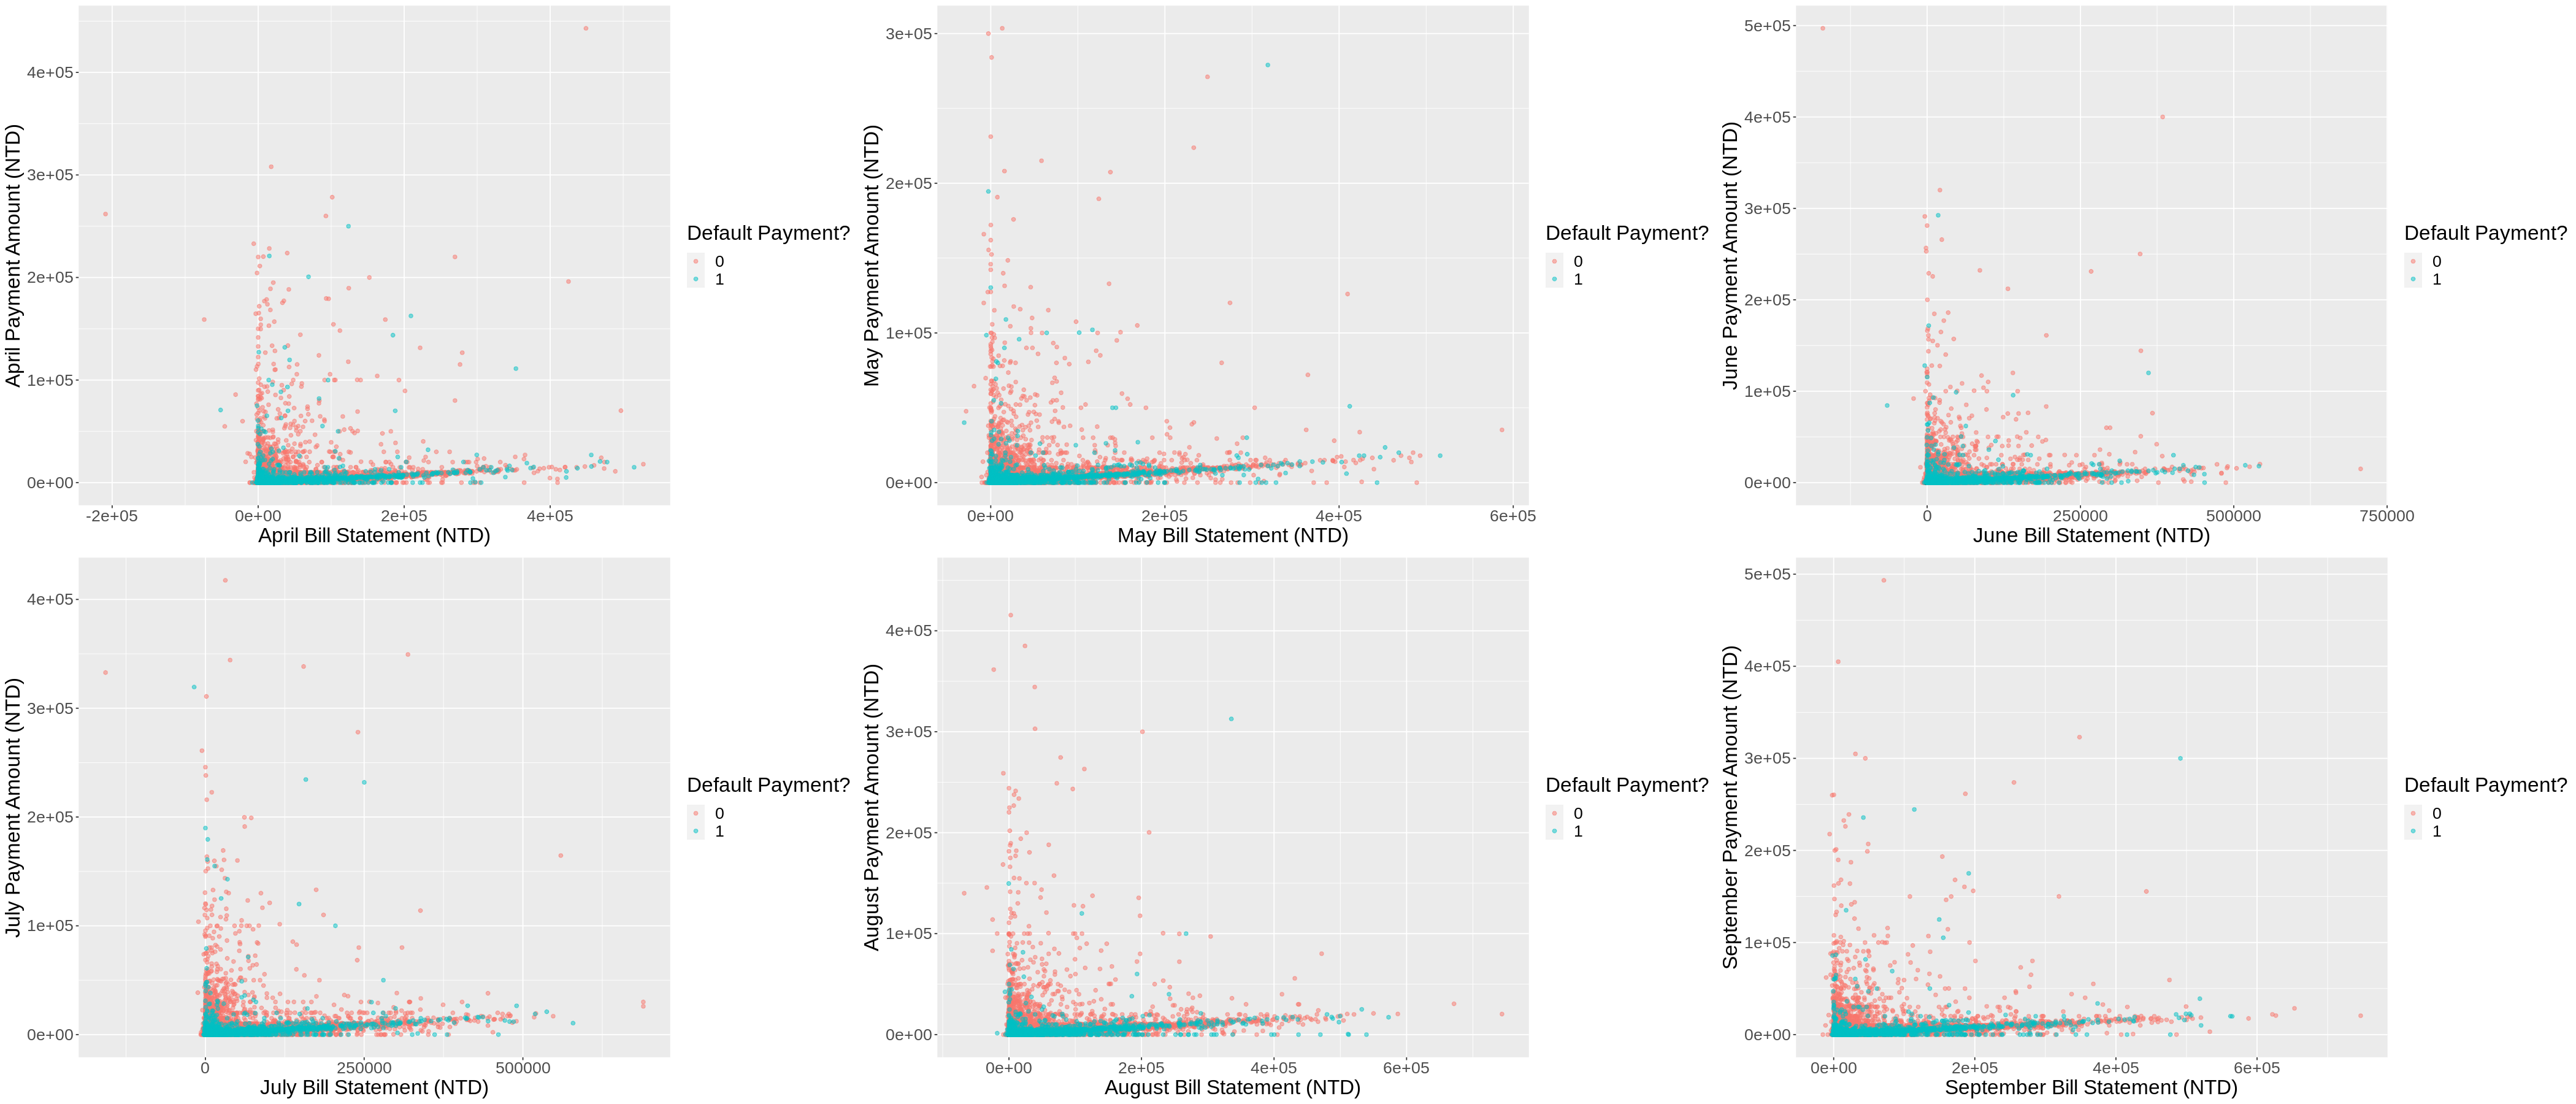

In [10]:
options(repr.plot.width = 35, repr.plot.height = 15)

#VISUALIZING ONE MONTH'S BILL STATEMENT AMOUNT AND PAYMENT AMOUNT

sept_bill_vs_payment <- credit_train |>
                        ggplot(aes(x = BILL_SEPT, y = PAY_SEPT, color = DEFAULT)) +
                        geom_point(alpha = 0.5) +
                        labs(x = "September Bill Statement (NTD)", 
                             y = "September Payment Amount (NTD)", 
                             color = "Default Payment?") +
                        theme(text = element_text(size = 20))

aug_bill_vs_payment <- credit_train |>
                       ggplot(aes(x = BILL_AUG, y = PAY_AUG, color = DEFAULT)) +
                       geom_point(alpha = 0.5) +
                       labs(x = "August Bill Statement (NTD)", 
                            y = "August Payment Amount (NTD)", 
                            color = "Default Payment?") + 
                       ylim(c(0, 450000)) +
                       theme(text = element_text(size = 20))

jul_bill_vs_payment <- credit_train |>
                       ggplot(aes(x = BILL_JUL, y = PAY_JUL, color = DEFAULT)) +
                       geom_point(alpha = 0.5) +
                       labs(x = "July Bill Statement (NTD)", 
                            y = "July Payment Amount (NTD)", 
                            color = "Default Payment?") +
                       theme(text = element_text(size = 20))

jun_bill_vs_payment <- credit_train |>
                       ggplot(aes(x = BILL_JUN, y = PAY_JUN, color = DEFAULT)) +
                       geom_point(alpha = 0.5) +
                       labs(x = "June Bill Statement (NTD)", 
                            y = "June Payment Amount (NTD)", 
                            color = "Default Payment?") +
                       theme(text = element_text(size = 20))

may_bill_vs_payment <- credit_train |>
                       ggplot(aes(x = BILL_MAY, y = PAY_MAY, color = DEFAULT)) +
                       geom_point(alpha = 0.5) +
                       labs(x = "May Bill Statement (NTD)", 
                            y = "May Payment Amount (NTD)", 
                            color = "Default Payment?") +
                       theme(text = element_text(size = 20))

apr_bill_vs_payment <- credit_train |>
                       ggplot(aes(x = BILL_APR, y = PAY_APR, color = DEFAULT)) +
                       geom_point(alpha = 0.5) +
                       labs(x = "April Bill Statement (NTD)", 
                            y = "April Payment Amount (NTD)", 
                            color = "Default Payment?") +
                       theme(text = element_text(size = 20))

#COMPARING ALL SIX MONTHS BESIDE ONE ANOTHER
plot_grid(apr_bill_vs_payment, may_bill_vs_payment,
          jun_bill_vs_payment, jul_bill_vs_payment,
          aug_bill_vs_payment, sept_bill_vs_payment,
          label_size = 12)

*Figure 3: Scatter Plots of Bill Statement Amount versus Payment Amount for each Month*

From Figure 3, it appears that credit defaulting occurs more often when clients make low payment amounts and when the bill statement amount is less than $25,000 NTD. Conversely, non-default behaviour is prominent at high payment amounts. The relationship between bill statement and payment amounts appear similar across all six months of data. As each month shows a similar trend, we choose to use the data from July, August, and September as our predictor variables for two reasons. First, as each month passes without a payment made, it becomes more difficult to catch-up on the next payment. Therefore, analyzing just the latter half of a six-month period is more representative of whether an individual will default. Considering three of six months disregards singular, outlying missed payments and instead tracks the amount of debt an individual has amassed over time. Moreover, reducing the number of predictors ensures that R can process the model in a timely manner.


Performing this exploratory analysis demonstrates the inbalance between bill statement amounts and payment amounts every month. The visualization in Figure 3 reveals the relationship between this inbalance and its effects on the distribution of default and non-default. We will use the predictor variables of `BILL_JUL`, `BILL_AUG`, `BILL_SEPT`, `PAY_JUL`, `PAY_AUG`, and `PAY_SEPT` to predict the target variable of `DEFAULT`. As an individual can either default or not, there are two categories that exist. As such, fitting a classification model allows us to predict a new label for the categorical response variable. Specifically, we will perform a binary classification to determine whether an individual will default using the K-nearest neighbours algorithm. 

#### <font color='green'> Data Analysis

We begin the data analysis by performing cross validation of five folds to select an optimal K value for our K-nearest neighbours classification model.

#### <font color='fushsia'> Cross Validation </font>

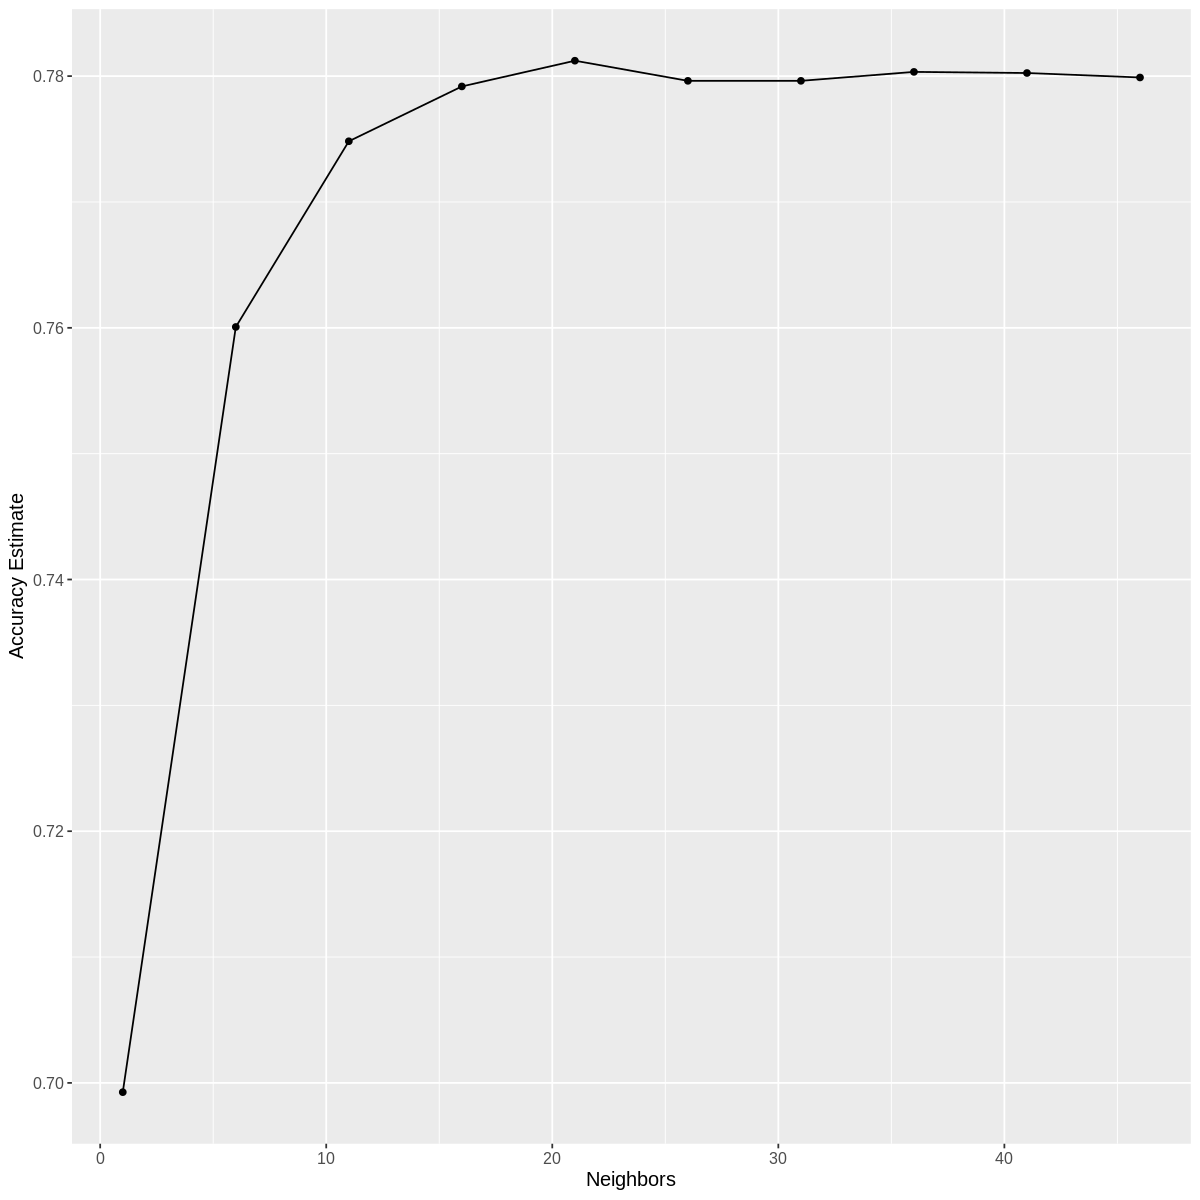

In [11]:
options(repr.plot.height = 10, repr.plot.width = 10)
set.seed(1)

credit_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = tune()) |>
               set_engine("kknn") |>
               set_mode("classification")

credit_vfold <- vfold_cv(credit_train, v = 5, strata = DEFAULT)

credit_recipe <- recipe(DEFAULT ~ BILL_JUL + BILL_AUG + BILL_SEPT
                        + PAY_JUL + PAY_AUG + PAY_SEPT, data = credit_train) |>
                 step_scale(all_predictors()) |>
                 step_center(all_predictors())

k_vals <- tibble(neighbors = seq(from = 1, to = 50, by = 5))

credit_validation_fit <- workflow() |>
              add_recipe(credit_recipe) |>
              add_model(credit_spec) |>
              tune_grid(resamples = credit_vfold, grid = k_vals) |>
              collect_metrics() 

accuracies <- credit_validation_fit |>
              filter(.metric == "accuracy")


accuracy_vs_k <- ggplot(accuracies, aes(x = neighbors, y = mean)) +
                 geom_point() +
                 geom_line() +
                 labs(x = "Neighbors", y = "Accuracy Estimate") + 
                 theme(text = element_text(size = 12))

accuracy_vs_k

*Figure 4: Plot of Accuracy versus the Number of Neighbors*

By Figure 4, we choose the number of neighbours to be 26 as it is between K = 20 and K = 50, such that we get roughly optimal accuracy, changing the K value to a nearby K value doesn't affect accuracy greatly, and because the number of neighbours is low enough that running the model isn't very expensive.

With the chosen K value of 26, we build our classification model using the same recipe as created during cross validation.

#### <font color='fushsia'> Model Building  </font>

In [12]:
set.seed(1)

credit_model_spec <- nearest_neighbor(weight_func = "rectangular", neighbor = 26) |>
              set_engine("kknn") |>
              set_mode("classification")

credit_model_fit <- workflow() |>
             add_recipe(credit_recipe) |>
             add_model(credit_model_spec) |>
             fit(data = credit_train)

credit_predictions <- predict(credit_model_fit, credit_test) |>
                      bind_cols(credit_test) 

credit_metrics <- credit_predictions |>
                  metrics(truth = DEFAULT, estimate = .pred_class) |>
                  filter(.metric == "accuracy")
credit_metrics

.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
accuracy,binary,0.7816582


*Table 7: Accuracy of the Classification Model*

Table 7 shows that our model has an accuracy of 78%, meaning that it correctly predicts whether an individual defaults 78% of the time. To determine how the model predicts new labels, we find and plot the confusion matrix. 

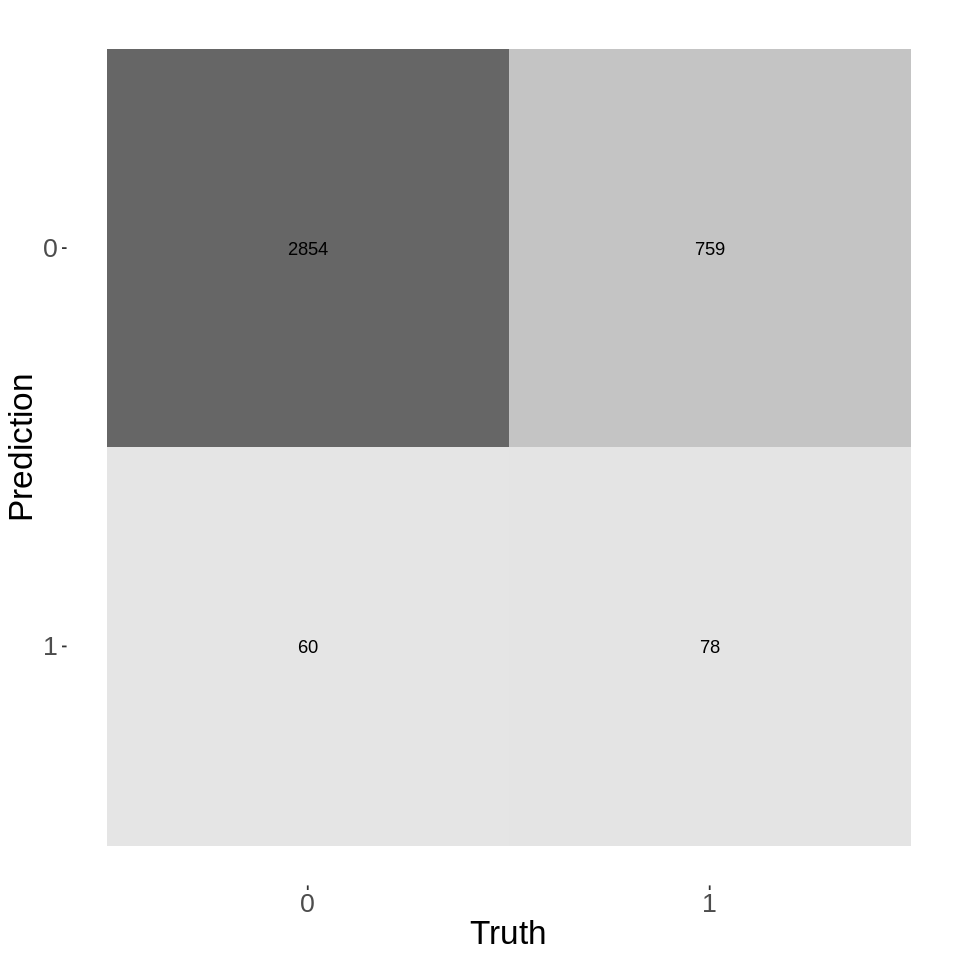

In [13]:
options(repr.plot.width = 8, repr.plot.height = 8)

credit_conf_mat <- credit_predictions |>
                   conf_mat(truth = DEFAULT, estimate = .pred_class)

autoplot(credit_conf_mat, type = "heatmap") + 
theme(text = element_text(size = 20))

*Figure 5: Confusion Matrix Plot of the Model*

Looking at Figure 5, we see that the model predicts that an individual does not default more often than default. The visual is a heat map, where predictions that occur most often are the darkest shades. Specifically, the model predicts that an individual will not default 96% of the time, calculated by dividing the total number of non-default predictions by the total number of predictions.

#### <font color='fushsia'> Classification Visualization </font>

To visualize the results of the classifier, we create scatterplots of the month's bill statement amount compared to its payment amount, with a colour mapping to whether or not the prediction was correct. We accomplish this by first adding a new column named `PREDICTION_RESULT` to the `credit_predictions` dataframe. In this new column, "true" means that the classifier correctly predicted whether an individual will default and "false" means that the classifier was incorrect. 

In [14]:
credit_predictions_result <- credit_predictions |>
                             mutate(PREDICTION_RESULT = ifelse(.pred_class == DEFAULT, "true","false"))
credit_predictions_result

.pred_class,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_HISTORY_SEPT,PAY_HISTORY_AUG,PAY_HISTORY_JUL,⋯,BILL_MAY,BILL_APR,PAY_SEPT,PAY_AUG,PAY_JUL,PAY_JUN,PAY_MAY,PAY_APR,DEFAULT,PREDICTION_RESULT
<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<chr>
0,26753,120000,1,1,2,28,0,0,0,⋯,49722,48898,3000,3000,2000,2000,2000,3000,0,true
0,8462,100000,2,2,2,27,0,0,0,⋯,48372,49412,2400,1776,3800,0,2000,1800,0,true
0,4050,160000,1,2,1,40,-1,-1,-1,⋯,0,0,2941,0,0,0,0,0,0,true
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋱,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
0,28112,210000,2,2,1,36,0,0,0,⋯,16069,13780,1534,1307,1116,437,399,276,0,true
0,25109,230000,1,2,1,60,0,0,0,⋯,124474,120570,6057,4845,4291,4115,4274,4054,0,true
0,29335,100000,1,1,2,27,0,0,0,⋯,12429,22315,1171,1303,1023,360,10000,442,0,true


*Table 8: Predictions Table with New Result Column*

Using the `credit_predictions_result` dataframe, we create a visualization of each month's bill statment amount and payment amount, with a colour mapping to the `PREDICTION_RESULT` column.

Warning message:
“Removed 2 rows containing missing values (geom_point).”
Warning message:
“Removed 2 rows containing missing values (geom_point).”
Warning message:
“Removed 6 rows containing missing values (geom_point).”


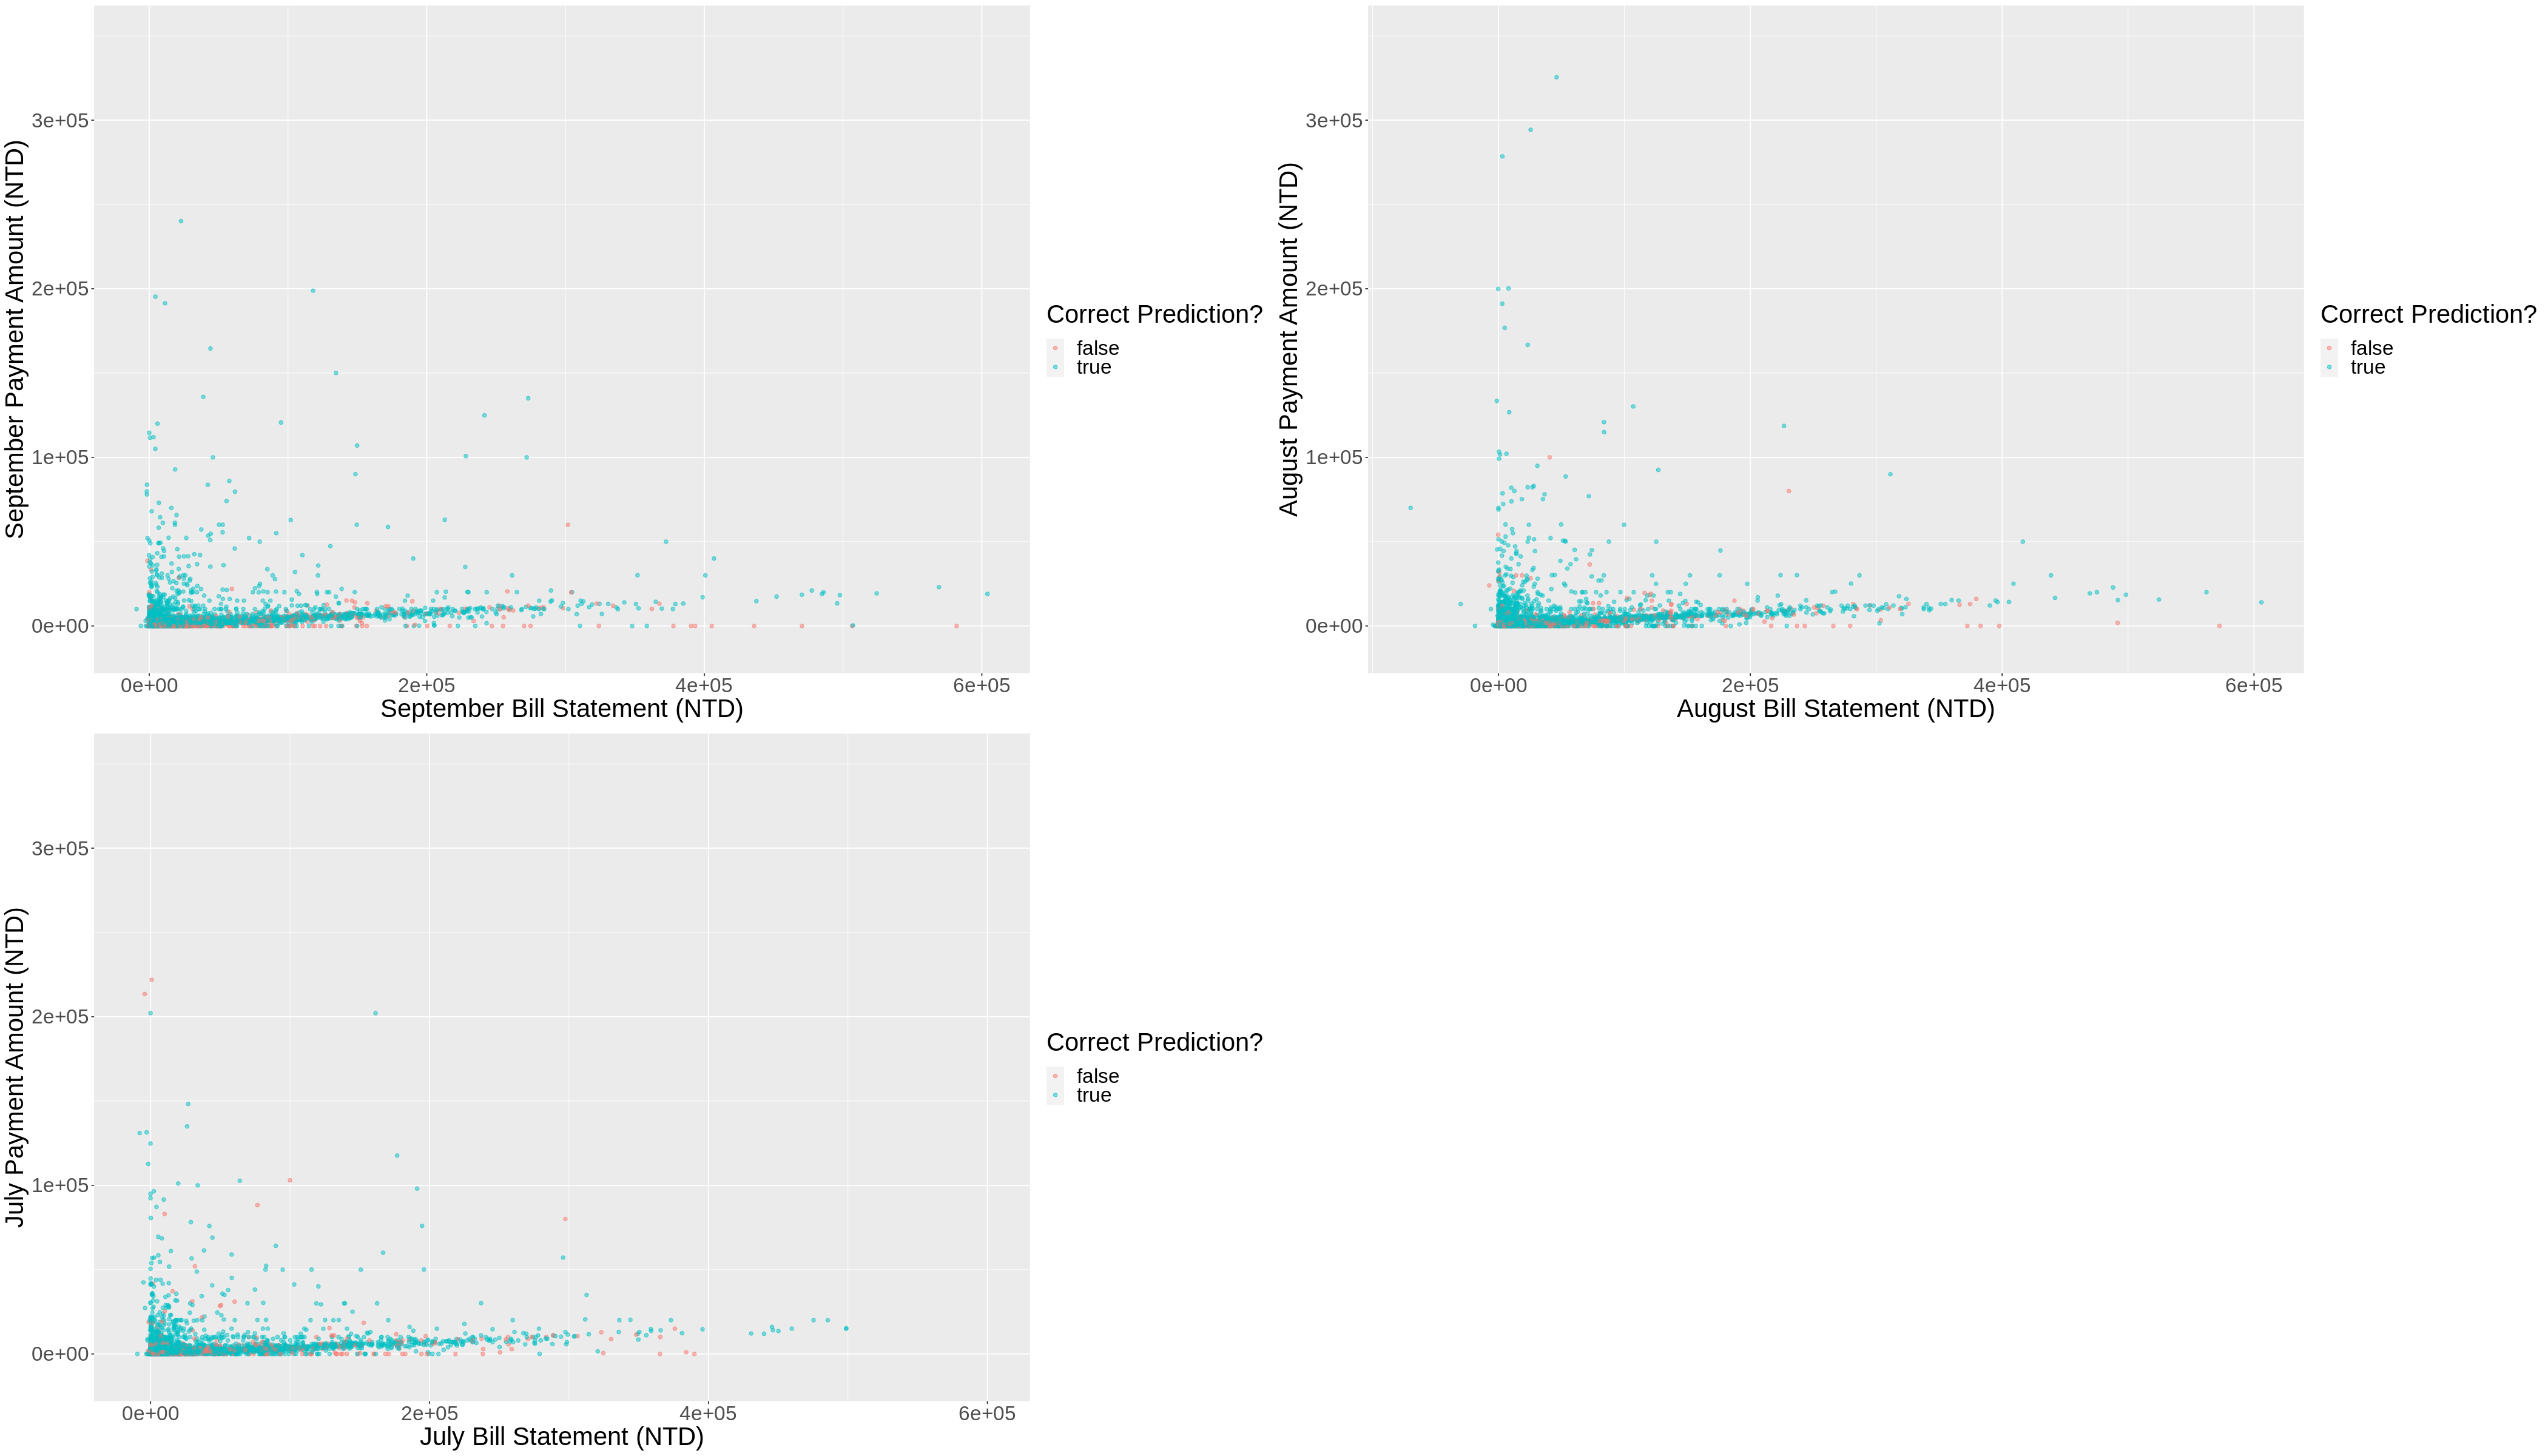

In [15]:
# VISUALIZING THE RESULTS OF ONE MONTH

options(repr.plot.width = 35, repr.plot.height = 20)

sept_bill_vs_payment_result <- credit_predictions_result |>
                               ggplot(aes(x = BILL_SEPT, y = PAY_SEPT, color = PREDICTION_RESULT)) +
                               geom_point(alpha = 0.5) +
                               labs(x = "September Bill Statement (NTD)", 
                                    y = "September Payment Amount (NTD)", 
                                    color = "Correct Prediction?") +
                               ylim(c(-10000, 350000)) +
                               theme(text = element_text(size = 25))

aug_bill_vs_payment_result <- credit_predictions_result |>
                              ggplot(aes(x = BILL_AUG, y = PAY_AUG, color = PREDICTION_RESULT)) +
                              geom_point(alpha = 0.5) +
                              labs(x = "August Bill Statement (NTD)", 
                                   y = "August Payment Amount (NTD)", 
                                   color = "Correct Prediction?") +
                              ylim(c(-10000, 350000)) +
                              theme(text = element_text(size = 25))

july_bill_vs_payment_result <- credit_predictions_result |>
                               ggplot(aes(x = BILL_JUL, y = PAY_JUL, color = PREDICTION_RESULT)) +
                               geom_point(alpha = 0.5) +
                               labs(x = "July Bill Statement (NTD)", 
                                    y = "July Payment Amount (NTD)", 
                                    color = "Correct Prediction?") +
                               xlim(c(-10000, 600000)) +
                               ylim(c(-10000, 350000)) +
                               theme(text = element_text(size = 25))

# PLACING EACH MONTH NEXT TO EACH OTHER
plot_grid(sept_bill_vs_payment_result,
          aug_bill_vs_payment_result,
          july_bill_vs_payment_result,
          label_size = 40)

*Figure 6: Scatter Plots on the Correctness of the Predictions*

Figure 6 above shows that the majority of observations are accurately predicted by the classifier, pictured in blue. The model is able to predict whether an individual defaults more accurately when payment amounts are high. Incorrect predictions occur most often when both bill statement amount and payment amounts are low.

### <font color='navy'> III. Discussion </font>

By Figure 6, we notice that the model is often able to accurately predict new labels for unseen observations with high payment amounts. Conversely, it is more difficult for the model to predict whether an individual defaults at low bill statment and payment amounts. Overall, the model has an accuracy of 78%. This moderate accuracy is expected as there are many overlapping observations in the lower left region of the graph. As the K-nearest neighbours algorithm relies on a Euclidean distance measure, it is sensitive to changes in regions of high data point concentration. In turn, this causes the accuracy of the model to decrease. 

An accuracy score of 78% can also be explained by the class imbalance in the dataset. As per Table 4, 78% of the labels in the dataset are non-default. When more observations are non-default, it may influence the model to predict non-default more often, as a majority vote of the nearby neighbours occurs in KNN classification.

It is also likely that more than just bill statement and payment amounts affect whether an individual defaults. The number of predictor variables was limited due to the scope of the project, however, variables such as age, credit limit, marital status, payment history, and education likely play a role in credit default as well. Therefore, the use of just two types of predictor variables can negatively affect the accuracy of this model as it is an oversimplification of a dynamic phenomenon.

Moreover, by the confusion matrix in Figure 5, we see that the model predicts non-default 96% of the time. Comparing the predicted proportion of non-default and the true proportion reveals the fallacy of the model. As the model predicts non-default 96% of the time compared to a proportion of 78% in the dataset, the model would be too lenient in practical application.

Furthermore, comparing the model's accuracy of 78% to the majority classifier that is also 78%, we see that the model does not peform exceptionally. This model does not improve upon the majority classifier, and therefore is not accurate enough to be implemented in the financial industry. However, the model can still be useful as a preliminary screening to determine that individuals with high payment amounts are unlikely to default. 

The impact of this model is two-fold. First, we see that just bill statment and payment amounts are not sufficient in accurately determining whether an individual will default. This demonstrates to the credit industry that there are extensive factos to consider when determining the probability of default. Second, this classification model, though flawed, reveals the significance and utility of predicting default and non-default. Detecting whether an individual may default can help both credit card clients and financial institutions identify warning signs to credit default. In turn, this allows individuals to plan ahead and assists financial institutions in risk assessment. An accurate prediction can help balance risk and return for banks, alerting them to charge higher rates for those posing higher risk or even deny new credit cards when required.

Creating this classification model is merely the first step of exploring credit default and the credit industry, thereby leading to the future questions of:

- How do categorical variables of sex, education, and marital status affect whether an individual defaults?
- How does payment history affect future payment amounts?
- How do bill statement and monthly payment amounts affect an individual's credit limit when applying for new credit cards?


### <font color='navy'> References

Bucci, S. (2022, April 26). Credit card default: What to do about it. Bankrate. Retrieved October 25, 2022, from https://www.bankrate.com/finance/credit-cards/credit-card-default/ 

Evans, P. (2022, March 16). Canada's inflation rate now at 30-year high of 5.7%. CBCnews. Retrieved October 25, 2022, from https://www.cbc.ca/news/business/canada-inflation-february-1.6386536 

Glesener, L. (n.d.). Confusion matrix – Model evaluation and performance metrics with yardstick – Quantargo. Quantargo. Retrieved December 1, 2022, from https://www.quantargo.com/courses/course-r-machine-learning-tidymodels/04-model-evaluation-performance-metrics-yardstick/03-classification-confusion-matrix/section-confusion-matrix

Plotting time series in R (for Prof. Scott). (n.d.). AWS. Retrieved December 1, 2022, from https://rstudio-pubs-static.s3.amazonaws.com/325621_fe5c68d1df274c6b8b287428bb484698.html

Senett, K. (2022, September 23). How much credit card debt does the average Canadian have? MoneySense. Retrieved October 25, 2022, from https://www.moneysense.ca/save/debt/how-much-credit-card-debt-does-the-average-canadian-have/ 

Wilke, C. O. (2020, December 15). Introduction to cowplot. R/CRAN. Retrieved October 25, 2022, from https://cran.r-project.org/web/packages/cowplot/vignettes/introduction.html

Yeh, I.-C. (2009). Default of credit card clients data set. UCI Machine Learning Repository. Retrieved October 25, 2022, from https://archive.ics.uci.edu/ml/datasets/default+of+credit+card+clients 